<a href="https://colab.research.google.com/github/2303A51830/2303A51830-AIML/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
Following is a breakup of credit approval status. 1 means appro

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

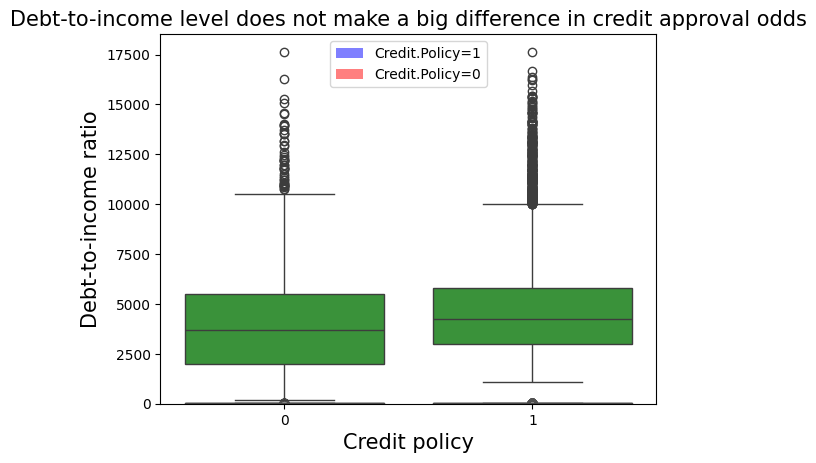

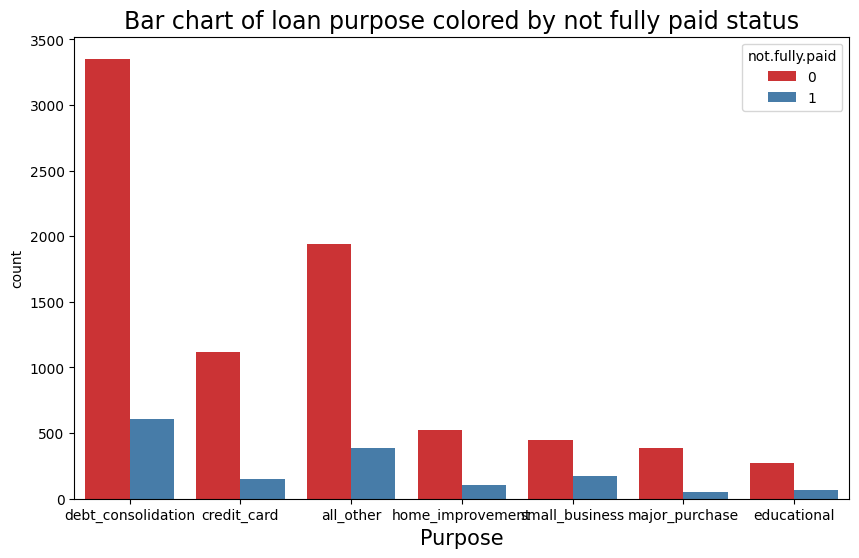

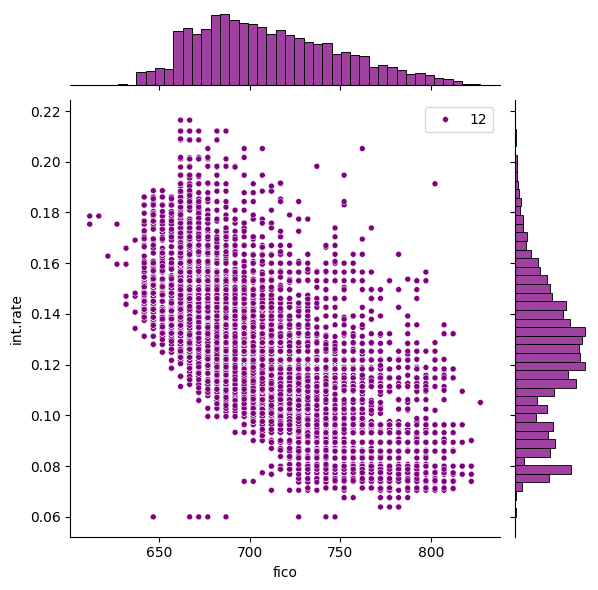

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

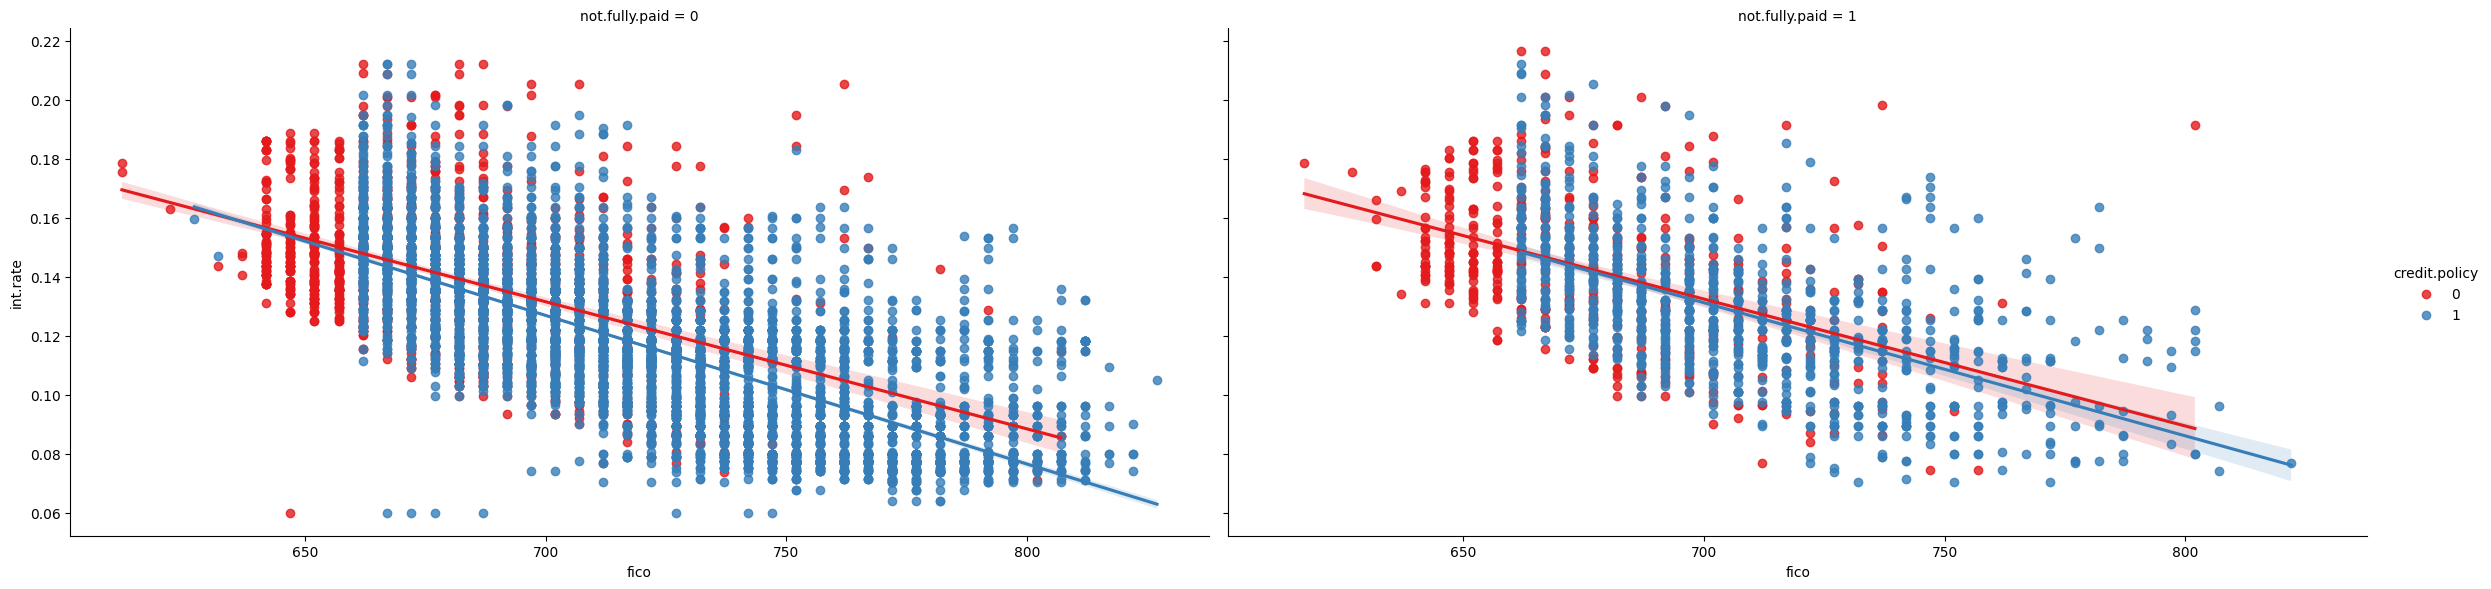

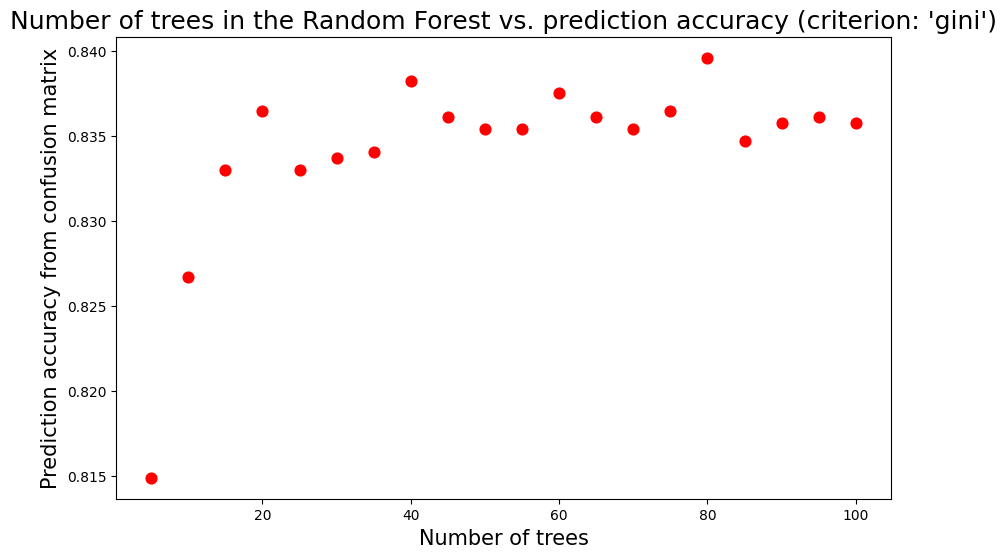

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('loan_data.csv')

df.info()
df.describe()
df.head()

print("Following is a breakup of credit approval status. 1 means approved credit, 0 means not approved.")
print(df['credit.policy'].value_counts())

df[df['credit.policy'] == 1]['fico'].plot.hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].plot.hist(bins=30, alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score by approved or disapproved credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

sns.boxplot(x=df['credit.policy'], y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Interest rate", fontsize=15)

sns.boxplot(x=df['credit.policy'], y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Log. annual income", fontsize=15)

sns.boxplot(x=df['credit.policy'], y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Days with credit line", fontsize=15)

sns.boxplot(x=df['credit.policy'], y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Debt-to-income ratio", fontsize=15)

plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

sns.jointplot(x='fico', y='int.rate', data=df, color='purple', size=12)

plt.figure(figsize=(14,7))
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy',
           col='not.fully.paid', palette='Set1', height=6, aspect=2)

df_final = pd.get_dummies(df, ['purpose'], drop_first=True)
df_final.head()

from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X.head()

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=None)
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print(cm)
print("Accuracy of prediction:", round((cm[0, 0] + cm[1, 1]) / cm.sum(), 3))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
cr = classification_report(y_test, predictions)
print(cr)

cm = confusion_matrix(y_test, rfc_pred)
print(cm)

# Simulation with different hyperparameters for RandomForest
nsimu = 21
accuracy = [0] * nsimu
ntree = [0] * nsimu
for i in range(1, nsimu):
        rfc = RandomForestClassifier(n_estimators=i * 5, min_samples_split=10, max_depth=None, criterion='gini')
        rfc.fit(X_train, y_train)
        rfc_pred = rfc.predict(X_test)
        cm = confusion_matrix(y_test, rfc_pred)
        accuracy[i] = (cm[0, 0] + cm[1, 1]) / cm.sum()
        ntree[i] = i * 5

plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu], y=accuracy[1:nsimu], s=60, c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

